## Interpolation using Lagrange polynomials (recap)

### Definition:

$$P_n(x)=\sum_{i=0}^{n}L_i(x) f(x_i) \quad \text{where} \quad L_i(x)=\prod_{j=0,j \neq i}^{n} \frac{(x-x_j)}{(x_i-x_j)}$$

example for n=2

$$P_2(x)=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_1)(x_2-x_2)}f(x_2)$$

### Details :
* not being used much in practice
* not easy to compute,
* but is good for $\color{red}{\text{methodology}}$
* see why:

Lets assume we have three points
$$x_0=1,	f(x_0)=4 \equiv y_1$$
$$x_1=2,	f(x_1)=5 \equiv y_2$$
$$x_2=3,	f(x_2)=6 \equiv y_3$$

One could construct a trial function that passes through the points:
$f(x)=4y_1 + 5y_2 + 6y_3$ with the task of finding $y_1,y_2,y_3$

If we try the first point $x_0=1$ then to get the right solution we have to have: $y_1=1$ and $y_2=y_3=0$ and that would give us what we want, which is $f(x_0)=4$

similarly for all three point we want:

$$ \quad \text{for} \quad x=1 \rightarrow y_1=1, y_2=y_3=0$$
$$ \quad \text{for} \quad x=2 \rightarrow y_2=1, y_1=y_3=0$$
$$ \quad \text{for} \quad x=3 \rightarrow y_3=1, y_1=y_2=0$$

Hence the task is to find expressions for $y_1,y_2,y_3$ such that the the upper conditions can be fulfiled 

For the first point the solution would be something like:

$$y_1=(x-2)(x-3)$$ 

so for $x=2$ or $x=3$ $\rightarrow$ $y_1=0$, but for $x=1 \rightarrow y_1=2$ but we want $y_1=2$  so we can normalize it:

$$y_1=\frac{(x-2)(x-3)}{(x_0-2)(x_0-3)}= 1 \quad \text{for} \quad (x=x_0), \quad \text{but} = 0  \quad \text{for} \quad (x=x_1=x_2) $$

$$y_2=\frac{(x-1)(x-3)}{(x_1-1)(x_1-3)}= 1 \quad \text{for} \quad (x=x_1), \quad \text{but} = 0  \quad \text{for} \quad (x=x_2=x_3) $$

$$y_3=\frac{(x-1)(x-2)}{(x_2-1)(x_2-2)}= 1 \quad \text{for} \quad (x=x_2), \quad \text{but} = 0  \quad \text{for} \quad (x=x_1=x_2) $$

The final solutions is

$$f(x)=y_1 4 + y_2 5+ y_3 6$$

Putting in the Langrange multipliers:

$$P(x)=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_1)(x_2-x_2)}f(x_3)$$

which is basically $P_2(x)$ that we showed at the beginning

The main property of Lagrange multipliers is that are zero for all other points except $x_i$ (which is normalized).


# Divided Differences

are fundamental elements for numerical calculations of interpolants, Newton, Lagrange, Hermite

### Derivation:

<img src="imgs/diff_divid.png" width="400" />

From the slope we see that:
$$\frac{f(x)-f(x_0)}{x-x_0} = \frac{f(x_1)-f(x_0)}{x_1-x_0}$$

$$f(x)=f(x_0) + \frac{f(x_1) - f(x_0)}{x_1-x_0} (x-x_0) $$

And get the first order polynomial:

$$f_1(x) = b_0 + b_1 (x-x_0)$$

Analogically the second order polynomial is:
$$f_2(x) = b_0 + b_1 (x-x_0)  + b_2 (x-x_0) (x-x_1) $$

Lets find $b_0, b_1, b_2 ...$

$$b_0 = f(x_0)$$

$$b_1 = \frac{f(x_1) - f(x_0)}{x_1 - x_0}  $$

$$b_2 = \frac{\frac{f(x_2) - f(x_1)}{x_2 - x_1} - \frac{f(x_1) - f(x_0)}{x_1 - x_0}}{x_2-x_0}  $$

Lets define the divided differences in recursive form:

$$f[x_0] = f(x_0) \quad \text{zeroth divided difference} $$


$$f[x_0,x_{1}] = \frac{f[x_{1}] - f[x_0]}{x_{1} - x_0} \quad \text{first divided difference} $$
$$f[x_1,x_{2}] = \frac{f[x_{2}] - f[x_1]}{x_{2} - x_1} \quad \text{first divided difference} $$


$$f[x_0,x_{1},x_{2}] = \frac{f[x_{1},x_{2}] - f[x_0,x_{1}]}{x_{2}-x_1} \equiv \frac{\frac{f[x_{2}] - f[x_1]}{x_{2} - x_1} - \frac{f[x_{1}] - f[x_0]}{x_{1} - x_0}}{x_{2}-x_1} \quad \text{second divided difference} $$

$$f[x_0,x_{1}...x_k] = \frac{f[x_{1},...,x_{k}] - f[x_0,...,x_{k-1}]}{x_{k}-x_0}  \quad \text{kth divided difference} $$




In [1]:
#Construction of a kth divided difference (recursive code)
def D( i, k, Xn, Yn ):
    #If k+i>N
    if i+k>=len(Xn):
        return 0
    #Zeroth divided difference
    elif k == 0:
        return Yn[i]
    #If higher divided difference
    else:
        return (D(i+1, k-1, Xn, Yn)-D(i, k-1, Xn, Yn))/(Xn[i+k]-Xn[i])

## Homework 1

Using the previous expression and the new defined function for divided differences, show both methods to calculate Lagrange interpolators are equivalents.

$$P_n(x)=\sum_{i=0}^{n}L_i(x) f(x_i) \quad \text{where} \quad L_i(x)=\prod_{j=0,j \neq i}^{n} \frac{(x-x_j)}{(x_i-x_j)}$$

is equivalent to:

$$P_n(x) = f[x_0] + \sum_{k=1}^n f[x_0,...,f_k] (x-x_0) \cdots (x-x_{k-1})$$
$$P_n(x) = f[x_0] + f[x_0,x_1](x-x_0) + f[x_0,x_1,x_2](x-x_0)(x-x_2) + ... $$


Note this expression is by far easier to be manipulated analytically as we can know the coefficients of each order.

# Introduction to Hermite Polynomial Interpolation 
* why do we need more methods?
* lets look at the following code:


(-1, 1)

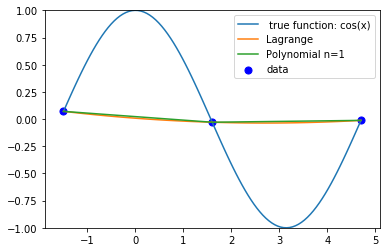

In [2]:
import numpy as np
from scipy.interpolate import CubicHermiteSpline
from scipy.interpolate import interp1d
from scipy.interpolate import lagrange

import matplotlib.pyplot as plt
x = np.array([-1.5, 1.6, 4.7])
y = np.array([0.071,-0.029,-0.012])
dydx=np.array([1,-1,1])

# Lagrange
L=lagrange(x,y)

# Linear polynomial n=1
poly1=interp1d(x,y,kind='linear') # kind='quadratic'

xtest=np.linspace(-1.5,4.7,101, endpoint=True)

fig,ax=plt.subplots(1,1)
ax.plot(xtest,np.cos(xtest),label=' true function: cos(x)')
ax.scatter(x,y,c='blue',s=50,label='data')
ax.plot(xtest,L(xtest),label='Lagrange')
ax.plot(xtest,poly1(xtest),label='Polynomial n=1')

ax.legend()
ax.set_ylim([-1,1])


# Hermite Interpolation

* Taylor  polynomials  allow  approximating  a  point,  the  function  and  its first  derivatives.  Lagrange polynomials  approximate points  and  none  of  its  derivatives.  Approximation  to  the function and to its first derivative is called Hermite interpolants
* So there extists an polynomial that involoves the interpolants and derivatives with the definition is this
* The definition in terms of divided differences is this:

Let's suppose a dataset $[{x_i}]_i$ for $i=0,1,⋯,n$ with the respective values $[{f(x_i)}]_i$ and $[{f′(x_i)}]_i$. If we assume two different polynomials to fit each set of data, i.e. a polynomial for $[{f(x_i)}]_i$ and another for $[{f′(x_i)}]_i$, we obtain $2n+2$ coefficients, however zeroth-order coefficients can be put together so finally there are $2n+1$ independent coefficients to be determined. In this case, we assign the respective Hermite polynimial as $H_{2n+1}(x)$.

The Hermite polynomial of degree $2n+1$ is defined as follows:

$$H_{2n+1}(x)=\sum_{j=0}^{n}f(x_j)H_{n,j}(x) + \sum_{j=0}^{n}f'(x_j)\hat{H}_{n,j}(x)$$
where
$$H_{n,j}(x) = [1-2(x-x_j)L'_{n,j}(x_j)]L^2_{n,j}(x) \quad \text{and} \quad \hat{H}_{n,j}(x) = (x-x_j)L^2_{n,j}(x_j)$$

and $L_{n,j}(x)$ denotes $j$th Lagrange coefficient polynomial of degree $n$

...but, thats not how we calculate it numerically. We use divided differences. 
### Derivation using divided differences:

Remembering the divided differences expression for a Lagrange polynomial is

$$P_n(x) = f[x_0] + \sum_{k=1}^n f[x_0,...,f_k] (x-x_0) \cdots (x-x_{k-1})$$

$$P_n(x) = f[x_0] + f[x_0,x_1](x-x_0) + f[x_0,x_1,x_2](x-x_0)(x-x_2) + ... $$

we define new sequence $z_0, z_1 ... z_n$ to facilitate the calculation of the differences such that

$z_{2_i} = z_{2_i+1} = x_i$ for each i=0,1,2,...,n

example:

if $i=0 \rightarrow z_{0} z_{1} = x_0 $

if $i=1 \rightarrow z_{2} z_{3} = x_1 $ ...

$$H_{2n+1}(x) = f[z_0] + \sum_{k=1}^{2n+1} f[z_0,...,z_k] (x-z_0)(x-z_1) \cdots (x-z_{k-1})$$

para n=2, por ejemplo

$$H_{5}(x) = f[z_0] + f[z_0,z_1](x-z_0) + f[z_0,z_1,z_2](x-z_0)(x-z_1) + f[z_0,z_1,z_2,z_3](x-z_0)(x-z_1)(x-z_2) + f[z_0,z_1,z_2,z_3,z_4](x-z_0)(x-z_1)(x-z_2)(x-z_3) + f[z_0,z_1,z_2,z_3,z_4,z_5](x-z_0)(x-z_1)(x-z_2)(x-z_3)(x-z_4)  $$

where the differences are defined as previously but with $x\rightarrow z$

$$f[z_0] = f(z_0) \quad \text{zeroth divided difference} $$


$$f[z_0,z_{1}] = \frac{f[z_{1}] - f[z_0]}{z_{1} - z_0} \quad \text{first divided difference} $$
$$f[z_1,z_{2}] = \frac{f[z_{2}] - f[z_1]}{z_{2} - z_1} \quad \text{first divided difference} $$


$$f[z_0,z_{1},z_{2}] = \frac{f[z_{1},z_{2}] - f[z_0,z_{1}]}{z_{2}-z_1} \equiv \frac{\frac{f[z_{2}] - f[z_1]}{z_{2} - z_1} - \frac{f[z_{1}] - f[z_0]}{z_{1} - z_0}}{z_{2}-z_1} \quad \text{second divided difference} $$


... $\color{red}{\text{HOWEVER}}$, notice in the table, that

$$f[z_0,z_{1}] = \frac{f[x_0] - f[x_0]}{x_0 - x_0} \quad \text {is uderfined!}$$

and we use Rolle's theorem to solve this problem and define

$$f[x_0,x_0] = \frac{f^{n} (x_0)}{n!} $$

$$f[z_{2i},z_{2i+1}] = f[x_i,x_i] = f(x_i)' = y'_i $$

![](https://raw.githubusercontent.com/sbustamante/ComputationalMethods/master/material/figures/table_coefficients.png)

In [3]:
#Construction of a kth divided difference for Hermite polynomials (recursive code)
def Dh( j, k, Zn, Yn, Ypn ):
    #If k+j>N
    if j+k>=len(Zn):
        return 0
    #Zeroth divided difference
    elif k == 0:
        return Yn[j/2]
    #First order divided difference (even indexes)
    elif k == 1 and j%2 == 0:
        return Ypn[j/2]
    #If higher divided difference
    else:
        return (Dh(j+1, k-1, Zn, Yn, Ypn)-Dh(j, k-1, Zn, Yn, Ypn))/(Zn[j+k]-Zn[j])
    
#Hermite Interpolating Function
def Hermite( x, Xn, Yn, Ypn ):
    n = len(Xn)
    #Auxiliar array
    Zn = np.zeros( 2*len(Xn) )
    #Even indexes
    Zn[::2] = Xn
    #Odd indexes
    Zn[1::2] = Xn
    
    #Detecting size of x
    try:
        Ninter = len(x)
    except:
        Ninter = 1
        x = np.array([x,])
    
    #First coeficient
    Hp = Dh(0, 0, Xn, Yn, Ypn)*np.ones(Ninter)
    
    #High-order coeficients
    for l in xrange(Ninter):
        for k in xrange(1, 2*n+2):
            Hp[l] += Dh(0, k, Zn, Yn, Ypn)*np.prod(x[l]-Zn[:k])
        
    return Hp    

###  Example - Calculating divided differences (by hand)

In [4]:
import pandas as pd
d = {
"i": [1,2,3],
"xi": [-1.5,1.6,4.7],
"yi": [0.071, -0.029, -0.010],
"y'i": [1, -1, 1]
}
df = pd.DataFrame(d)
df.head()

i   xi     yi  y'i
0  1 -1.5  0.071    1
1  2  1.6 -0.029   -1
2  3  4.7 -0.010    1

Here n=2 so the Hermite polynomial will be in the order of 2n+1 = 5

$z_{2_i} = z_{2_i+1} = x_i$ for each i=0,1,2,...,n

if $i=0 \rightarrow z_{0}, z_{1} = x_0 =-1.5 $

if $i=1 \rightarrow z_{2}, z_{3} = x_1 = 1.6 $ 

if $i=2 \rightarrow z_{4}, z_{5} = x_2 = 4.7$ 

and the values of the function at those points

$f(z_{0}), (z_{1}) = f(x_0) = 0.071 $

$f(z_{2}), f(z_{3}) = f(x_1) = -0.029 $ 

$f(z_{4}), f(z_{5}) = f(x_2) = -0.010 $ 


<img src="imgs/Hermite_numeric_example.png" width="700" />


In [5]:
p1=-1.5; p2=1.6; fp1=0.071; fp2=-0.029
fp1p2=(fp2-fp1)/(p2-p1)
print(fp1p2)

p1=-1.5; p2=1.6; fp1=-0.33; fp2=-0.31
fp1p2=(fp2-fp1)/(p2-p1)
print(fp1p2)

-0.03225806451612903
0.006451612903225812


collecting the differences the polynomial becomes:

$H_5(x)=\color{blue}{\text{0.071}} + 1(x + 1.5)−\color{blue}{\text{0.33}}(x + 1.5)^2 + \color{blue}{\text{0.0065}}(x + 1.5)^2 (x −1.6)+ \color{blue}{\text{0.015}}(x + 1.5)^2 (x −1.6)^2 \color{blue}{\text{-0.005}}(x + 1.5)^ 2 (x −1.6)^2 (x −4.7)$

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
d = {
"i": [1,2,3],
"xi": [-1.5,1.6,4.7],
"yi": [0.071, -0.029, -0.010],
"y'i": [1, -1, 1]
}
df = pd.DataFrame(d)
df.head()


i   xi     yi  y'i
0  1 -1.5  0.071    1
1  2  1.6 -0.029   -1
2  3  4.7 -0.010    1

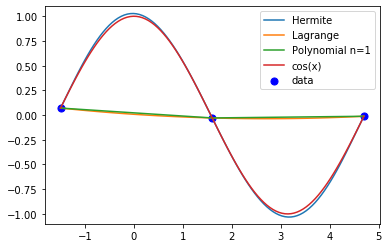

In [7]:
import numpy as np
from scipy.interpolate import CubicHermiteSpline
from scipy.interpolate import interp1d
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

###############################################################################################
###############################################################################################
def hdiff(x, y, yprime):
    m = x.size # here m is the number of data points. Note n=m-1
# and 2n+1=2m-1
    l = 2*m
    z = np.zeros(l)
    a = np.zeros(l)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    for i in range(m):
        a[2*i] = y[i]
        a[2*i+1] = y[i]
    for i in np.flip(np.arange(1, m)): # computes the first divided
# differences using derivatives
       a[2*i+1] = yprime[i]
       a[2*i] = (a[2*i]-a[2*i-1]) / (z[2*i]-z[2*i-1])
    a[1] = yprime[0]
    for j in range(2, l): # computes the rest of the divided differences
        for i in np.flip(np.arange(j, l)):
            a[i]=(a[i]-a[i-1]) / (z[i]-z[i-j])
    return a
    
def hermite(x, y, yprime, w):
    m = x.size # here m is the number of data points. not the
    # degree of the polynomial
    a = hdiff(x, y, yprime)
    z = np.zeros(2*m)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    sum = a[0]
    pr = 1.0
    for j in range(2*m-1):
        pr *= w-z[j]
        sum += a[j+1]*pr
    return sum    
###############################################################################################
###############################################################################################

x = np.array([-1.5, 1.6, 4.7])
y = np.array([0.071,-0.029,-0.012])
yprime=np.array([1,-1,1])

xdata=np.linspace(-1.5,4.7,101, endpoint=True)

#Hermite
Hinterp = hermite(x, y, yprime, xdata)
#Hinterp=CubicHermiteSpline(x, y, dydx, axis=0, extrapolate=None)

# Lagrange
L=lagrange(x,y)

# Linear polynomial n=1, see the documentation 
poly1=interp1d(x,y,kind='linear') # kind='quadratic'

fig,ax=plt.subplots(1,1)
ax.scatter(x,y,c='blue',s=50,label='data')
ax.plot(xdata,Hinterp,label='Hermite')
ax.plot(xdata,L(xdata),label='Lagrange')
ax.plot(xdata,poly1(xdata),label='Polynomial n=1')
ax.plot(xdata,np.cos(xdata),label='cos(x)')
ax.set_ylim([-1.1,1.1])
ax.legend()


## <font color='red'> **Activity** </font>

<font color='red'>    

Calculate a routine, using the previous program for divided differences, that computes the Hermite polynomial given a dataset.

Generate a set of $N$ points of the function $\sin^2(x)$ between $0$ and $2\pi$, including an array of $x$ positions, $y = f(x)$ and first derivative $y' = f'(x)$.

Show which polynomial gives the best approximation to the real function, Hermite or Lagrange polynomial.

</font>

<font color='white'>    
https://github.com/restrepo/ComputationalMethods/blob/master/activities/hermite-and-lagrange.ipynb
</font>
    

## Spline - Piecewise interpolation (Linear, Quadratic, Cubic)
* why is it called spline: spline is a thin flexible stripe of wood, hard rubber, metal or plastic that is used to connect ends of elements
* in case of Newton, Lagrange, Hermite interpolation the degree of the interpolating polynomial is directly linked to the number of data points!!!
* the difference between other previous interpolaton methods: in spline interpolation instead of finding a single polynomial that fits the given data, we find one low-degree polynomial that fits every $\color{red}{\text{pair of data}}$ (pair of data - thats why is called piecewise interpolation - interpolate "piece by piece")

* Linear $P(x) = a_0x + a_1$

<img src="imgs/linear_spline.png" width="300" />


* Quadratic $P(x) = a_0 + a_1x + a_2x^2 $
<img src="imgs/quadratic_spline.png" alt="Drawing" style="width: 300px;"/>

* Cubic $P(x) = a_0 + a_1x + a_2x^2 + a_3x^3$ (piecewise)
<img src="imgs/cubic_spline.png" alt="Drawing" style="width: 300px;"/>

* very often we know the points are connected smooth way. 
* spline can use the condition of smooth continuity (smooth transition) at each point and get the best interpolation
* linear piecewise elements are continuous but not differentiable
* mathematically smooth means that at each point the first and second derivatives match
* cubic makes the connection with the points "more smooth"
* so we are left with two choices: quadratic and cubic - 
* cubic polynomial better satisfies the smoothness for the first and second derivative
* one can imagine two rods pointing in the same direction - one can connect them smoothly only with at least third degree polynomial 

## Example of manual calculation of two polynomials for Spline interpolation

### To have a better insight into the operation of the spline method let's perform analytical spline interpolation on three points using cubic polynomial

Let say the points are: 

$(x_1 = 0, y_1 = 0)$ 

$(x_2 = 1, y_2 = 1)$ 

$(x_3 = 2, y_3 = 0) $

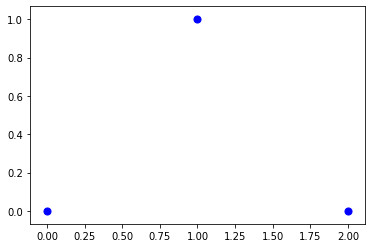

In [8]:
import numpy as np
import matplotlib.pyplot as plt
x=np.array([0,1,2])
y=np.array([0,1,0])
fig, axes = plt.subplots(1,1)
axes.scatter(x,y,c='blue',s=50)



The general third order polynomials are:
$$ S_0(x) = a_0 + b_0x + c_0x^2 + d_0x^3 $$
$$ S_1(x) = a_1 + b_1x + c_1x^2 + d_1x^3 $$

We have here 8 variables to find $a_0... d_1$, but we already know some things about those equations.

The interpolation equations are:
$$ S_0(0) = 0 \rightarrow a_0 = 0 $$
$$ S_0(1) = 1 \rightarrow a_0 + b_0 + c_0 + d_0 = 1 $$
$$ S_1(1) = 1 \rightarrow a_1 + b_1 + c1 + d1 = 1 $$
$$ S_1(2) = 0 \rightarrow a_1 + 2b_1 + 4c_1 + 8d_1 = 0 $$

Moreover we can impose smoothness conditions:
$$ S'_0(1) = S'_1(1)     \rightarrow  b_0 + 2c_0 + 3d_0 = b_1 + 2c_1 + 3d_1 $$
$$ S''_0 (1) = S''_1 (1) \rightarrow 2 c_0 + 6d_0 = 2c_1 + 6_d $$

And the boundary condition:
$$ S''_0 (0) = 0 \rightarrow 2 c_0 = 0 $$
$$ S''_1 (2) = 0 \rightarrow 2 c_1 + 12d_1 = 0 $$


* we have eight unknowns and eight equations!

$$ b_0 + d_0 = 1 $$
$$ a_1 + b_1 + c_1 + d_1 = 1 $$
$$ a_1 + 2b_1 + 4c_1 + 8d_1 = 0 $$
$$ b_0 + 3d_0 -b1 + 2c_1 + 3d_1 = 0  $$
$$ 3d_0 -c_1 + 3d_1 = 0  $$
$$ c_1 + 6d_1 = 0 $$ 

* that can be simply solved:

$$ Ax = v$$ 

np.linalg.solve(A, v)

$$ S_0(x) = 1.5x  - 0.5x^3 $$ 
$$ S_1(x) =  - 1 + 4.5x  -3x^2 + 0.5x^3 $$ 

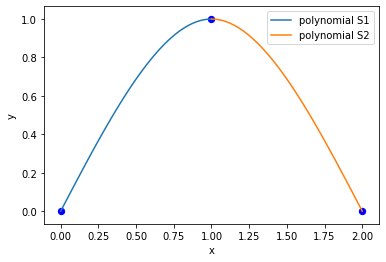

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x=np.array([0,1,2])
y=np.array([0,1,0])

xs1=np.linspace(0,1,100)
xs2=np.linspace(1,2,100)

S1 = 1.5*xs1 - 0.5*xs1**3.0
S2 = -1.0 + 4.5*xs2 - 3*xs2**2.0 + 0.5*xs2**3.0
fig, axes = plt.subplots(1,1)
axes.scatter(x,y,c='blue',s=40)
axes.plot(xs1,S1,label='polynomial S1')
axes.plot(xs2,S2,label='polynomial S2')
axes.legend()
axes.set_xlabel('x')
axes.set_ylabel('y')
plt.show()


### Numerical example using scipy build in functions

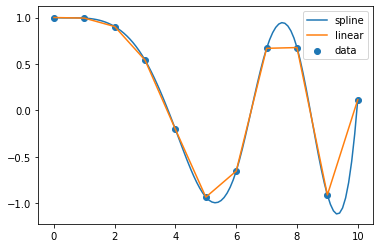

In [10]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.array([0,1,2,3,4,5,6,7,8,9,10],dtype='float')
#y = np.sin(x)
y = np.cos(-x**2/9.0)

fspline = CubicSpline(x, y)
finterp = interp1d(x, y, kind='linear')

xdata = np.linspace(0, 10, 101, endpoint=True)

fig, ax = plt.subplots(1,1)
ax.scatter(x, np.cos(-x**2/9.0), label="data")

ax.plot(xdata, fspline(xdata), label="spline")
ax.plot(xdata, finterp(xdata), label='linear')
ax.legend()
plt.show()

### questions:
* what is the difference between spline and other methods: Newton, Lagrange, Hermite polynomial interpolation?
* what does it mean: picewise interpolation?
* why cubic spline is more common than quadratic?